# MuZero

This notebook is just an example to show how to run [MuZero (https://github.com/sinaai/muzero)](https://github.com/sinaai/muzero) in Google Colab or Jupyter Notebook. You can also launch MuZero directly by cloning the github repository and running the command `python muzero.py`.

In [1]:
!git clone https://github.com/sinaai/MuZero.git
%cd MuZero/
!pip install -r requirements.txt

Cloning into 'MuZero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
/content/MuZero
     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 3.8MB 38.9MB/s 
     |████████████████████████████████| 450kB 48.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d5662abdc99bf359d0842ad2fedcfca65c2eb2e990de87624d1ba4a5e3f39d1f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninst

In [9]:
from helper import SharedStorage, MuZeroConfig, ReplayBuffer, make_cartpole_config
from self_play import run_selfplay, run_eval
from training import train_network

# MuZero training is split into two independent parts: Network training and
# self-play data generation.
# These two parts only communicate by transferring the latest network checkpoint
# from the training to the self-play, and the finished games from the self-play
# to the training.
train_scores = []
eval_scores = []
def muzero(config: MuZeroConfig):

    storage = SharedStorage(config.new_network(), config.uniform_network(), config.new_optimizer())
    replay_buffer = ReplayBuffer(config)

    for loop in range(config.nb_training_loop):
        print("Training loop", loop)
        score_train = run_selfplay(config, storage, replay_buffer, config.nb_episodes)
        train_network(config, storage, replay_buffer, config.nb_epochs)
        score_eval = run_eval(config, storage, 20)

        print("Train score:", score_train)
        print("Eval score:", score_eval)
        print(f"MuZero played {config.nb_episodes * (loop + 1)} "
              f"episodes and trained for {config.nb_epochs * (loop + 1)} epochs.\n")
        train_scores.append(score_train)
        eval_scores.append(score_eval)

    return storage.latest_network()

config = make_cartpole_config()
muzero(config)

Training loop 0
2020-08-02 19:21:52.828729: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-02 19:21:52.832882: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-08-02 19:21:52.833109: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d44bc0 executing computations on platform Host. Devices:
2020-08-02 19:21:52.833178: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can di

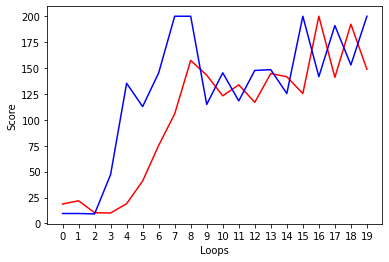

In [44]:
import matplotlib.pyplot as plt

plt.plot(train_scores, color="red")
plt.plot(eval_scores, color="blue")
plt.xticks(range(20))
plt.xlabel('Loops')
plt.ylabel('Score')
plt.show()